In [15]:
# Install necessary libraries in Colab
!pip install kagglehub scikit-learn matplotlib seaborn pandas numpy

In [16]:
# Import libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [17]:
# Load the dataset
path = kagglehub.dataset_download("kashyapankush/boston-housing-dataset")
print("Path to dataset files:", path)
boston = pd.read_csv(f"{path}/boston_house_prices.csv")
print(boston.head())


Path to dataset files: /root/.cache/kagglehub/datasets/kashyapankush/boston-housing-dataset/versions/1
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

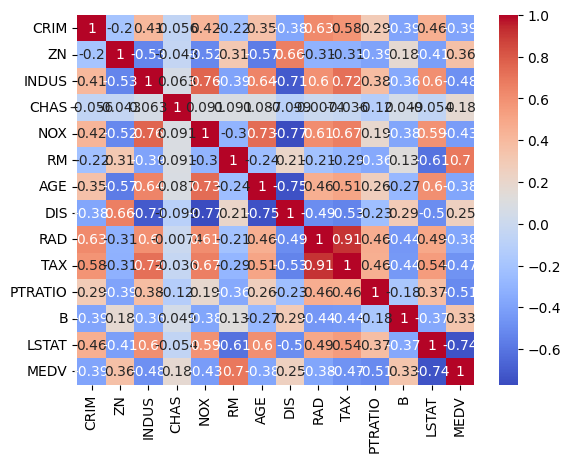

In [18]:
# 2. Exploratory Data Analysis (EDA)
print(boston.describe())
sns.heatmap(boston.corr(), annot=True, cmap="coolwarm")
plt.show()

In [19]:
# 3. Data Preprocessing
X = boston.drop(['MEDV'], axis=1)
y = boston['MEDV']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
# 5. Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Gradient Boosting Regressor model for comparison
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=10, learning_rate=1.0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=10)

In [23]:
# 6. Prediction and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R² Score: {r2}")

Linear Regression - Mean Squared Error: 24.291119474973513
Linear Regression - R² Score: 0.668759493535632


In [24]:
# Gradient Boosting predictions and evaluation
y_pred_gbr = gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting - Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting - R² Score: {r2_gbr}")


Gradient Boosting - Mean Squared Error: 16.75586886495614
Gradient Boosting - R² Score: 0.7715122806589112


In [25]:
# 7. Cross-Validation
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
print("Cross-Validation R² Scores (Linear Regression):", scores)
print("Mean Cross-Validation R² Score:", np.mean(scores))


Cross-Validation R² Scores (Linear Regression): [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Mean Cross-Validation R² Score: 0.35327592439588207


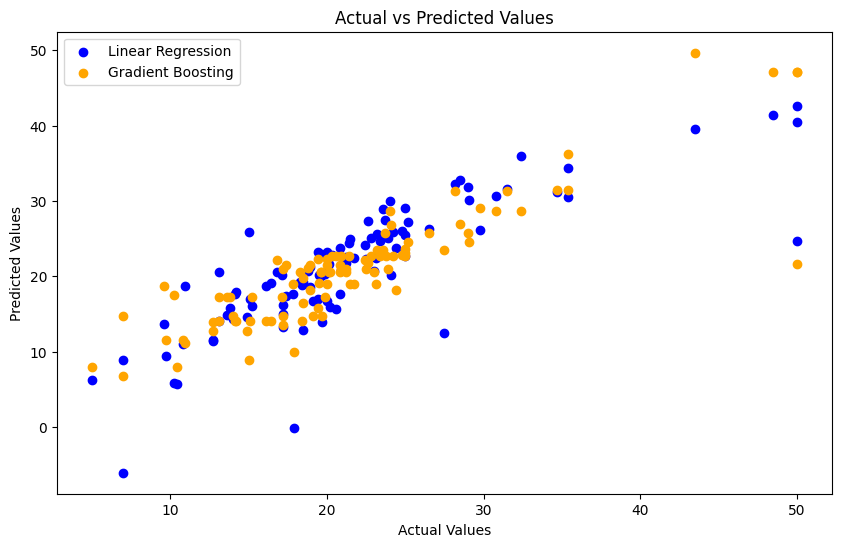

In [26]:
# 8. Visualization of Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Linear Regression", color="blue")
plt.scatter(y_test, y_pred_gbr, label="Gradient Boosting", color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()

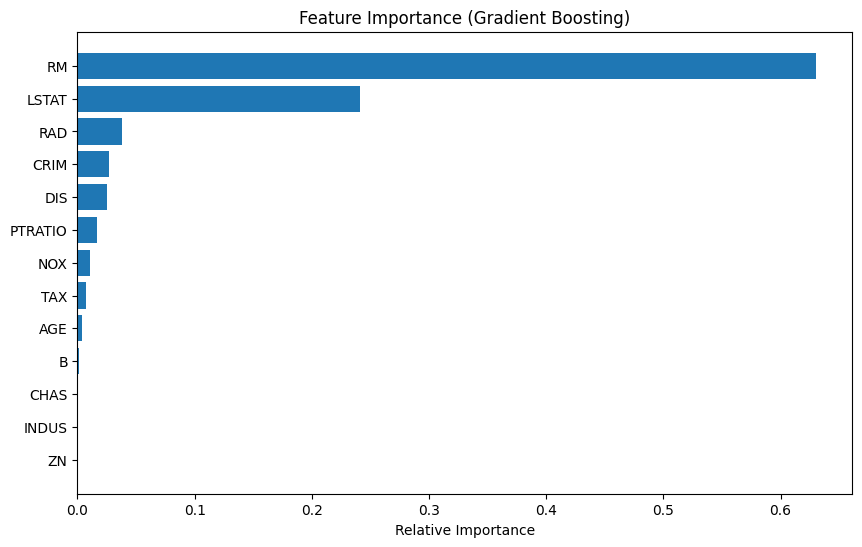

In [27]:
# Feature Importance from Gradient Boosting
feature_imp = gbr.feature_importances_
sorted_idx = np.argsort(feature_imp)
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_imp[sorted_idx], align="center")
plt.yticks(range(X.shape[1]), boston.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Feature Importance (Gradient Boosting)")
plt.show()